# Model: Classification with Logistic Regression, LDA/QDA, Decision Tree, Random Forest and AdaBoost


<hr style="height:2pt">




In [1]:
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import json
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import recommend_songs_set as recs #function list created for song recommendation
import spotify_api_function_set as sps

In [2]:
#reading playlist files which are in json format
path = "/Users/yalda/Dropbox/DS Project/01 - Data/playlist_df"
df_temp = pd.read_csv(path+"/playlist_df_ballanced.csv")
df = pd.DataFrame(df_temp.fillna(0))
len(df)

1325

In [3]:
df_model = df.copy()
#df_model = df_model.drop(["pid",'playlist_genre'])
data_train, data_test = train_test_split(df, test_size=.25, random_state=99, stratify = df.playlist_genre);
y_train = data_train['playlist_genre']
x_train = data_train.drop(columns = ['pid','playlist_genre','genre_other','genre_pop','genre_pop rock','genre_rap','genre_rock'])
y_test = data_test['playlist_genre']
x_test_pid = data_test.pid
x_test = data_test.drop(columns = ['pid','playlist_genre','genre_other','genre_pop','genre_pop rock','genre_rap','genre_rock'])

In [4]:
cv_scores = pd.DataFrame(np.zeros((5,4)))
cv_scores.columns = ['logreg model','polynomial logreg model','lda','qda']

## Model 1: Logistic regression with cross validation

For the first base model, we used logistic regression with corss validation. CS is used to reduce the chance of the overfitting to the training set. And we saved the accuarcy result in a cv_scores. 

**Standardization of dataset** 
Due to difference in the scale of the variables, we fitted the model with the standardized data.

In [5]:
reg1_time = time.time()
logreg_model2 = make_pipeline(
    StandardScaler(),
    LogisticRegressionCV(multi_class="ovr", cv=5)).fit(x_train, y_train)
reg1_time = time.time()- reg1_time
print(str(reg1_time)+' seconds' )

0.6866209506988525 seconds


In [6]:
cv_scores['logreg model'] = cross_val_score(logreg_model2, x_test, y_test, cv=5)
print("The 5-fold CV score for linear model on test set is:\n"+str(cross_val_score(logreg_model2, x_test, y_test, cv=5))) 
print("Training set score is:\n"+str(logreg_model2.score(x_train,y_train))) 
print("Test set score is:\n" , logreg_model2.score(x_test,y_test))

The 5-fold CV score for linear model on test set is:
[0.61428571 0.62686567 0.53846154 0.67692308 0.52307692]
Training set score is:
0.6122860020140987
Test set score is:
 0.6024096385542169


## Model 2 : Polynomial logistic regression with cross validation

For the second model, we added the polynomial degree 2 to the features list, to give more felxibility to the bouandaries of the classification. And in the summary table we campare the performance of the model.


In [7]:
preg_time = time.time()
polynomial_logreg_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    LogisticRegressionCV(multi_class="ovr", cv=5)).fit(x_train, y_train);
preg_time = time.time()- preg_time
print(str(preg_time)+' seconds' )

2.930776834487915 seconds


In [8]:
print("The 5-fold CV score for polynomial logreg model on test set is:\n" +str(cross_val_score(polynomial_logreg_model, x_test, y_test, cv=5))) 
cv_scores['polynomial logreg model'] = cross_val_score(polynomial_logreg_model, x_test, y_test, cv=5)
print("Training set score is:\n"+str(polynomial_logreg_model.score(x_train,y_train))) 
print("Test set score is:\n" , polynomial_logreg_model.score(x_test,y_test))


The 5-fold CV score for polynomial logreg model on test set is:
[0.58571429 0.73134328 0.64615385 0.66153846 0.6       ]
Training set score is:
0.7502517623363545
Test set score is:
 0.6897590361445783


---
## Model 3 : LDA

In [9]:
lda_time = time.time()
lda = LinearDiscriminantAnalysis().fit(x_train, y_train)
lda_time = time.time()- lda_time
print(str(lda_time)+' seconds' )

0.014289140701293945 seconds


In [10]:
cv_scores['lda'] = cross_val_score(lda, x_test, y_test, cv=5)
print("The 5-fold CV score for lda model on test set is:\n" +str(cross_val_score(lda, x_test, y_test, cv=5)), "\n average score is =",np.mean(cross_val_score(lda, x_test, y_test, cv=5)) ) 
print("Training set score is:\n"+str(lda.score(x_train,y_train))) 
print("Test set score is:\n" , lda.score(x_test,y_test))

The 5-fold CV score for lda model on test set is:
[0.61428571 0.6119403  0.6        0.53846154 0.55384615] 
 average score is = 0.5837067410201738
Training set score is:
0.622356495468278
Test set score is:
 0.6295180722891566


## Model 4 : QDA

In [11]:
qda_time = time.time()
qda = QuadraticDiscriminantAnalysis().fit(x_train, y_train)

qda_time = time.time()- qda_time
print(str(lda_time)+' seconds' )

0.014289140701293945 seconds


In [12]:
cv_scores['qda'] = cross_val_score(qda, x_test, y_test, cv=5)
print("The 5-fold CV score for polynomial logreg model on test set is:\n"+str(cross_val_score(qda, x_test, y_test, cv=5)), "\n average score is =",np.mean(cross_val_score(qda, x_test, y_test, cv=5)) ) 
print("Training set score is:\n"+str(qda.score(x_train,y_train))) 
print("Test set score is:\n" , qda.score(x_test,y_test))

The 5-fold CV score for polynomial logreg model on test set is:
[0.58571429 0.70149254 0.64615385 0.67692308 0.56923077] 
 average score is = 0.6359029030670822
Training set score is:
0.6606243705941591
Test set score is:
 0.6174698795180723


---
## Model 5: Simple Decision tree

We used the depths of the tree as a hyperparamether and at the end of checking the performance of trees with different depth, we creatd a decision tree with the best depth 

In [37]:
depths = list(range(1, 21))
train_scores, cvmeans, cvstds = [], [], []
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    train_scores.append(clf.fit(x_train, y_train).score(x_train, y_train))
    scores = cross_val_score(estimator=clf, X=x_test, y=y_test, cv=5)
    cvmeans.append(scores.mean())
    cvstds.append(scores.std())

cvmeans = np.array(cvmeans)
cvstds = np.array(cvstds)

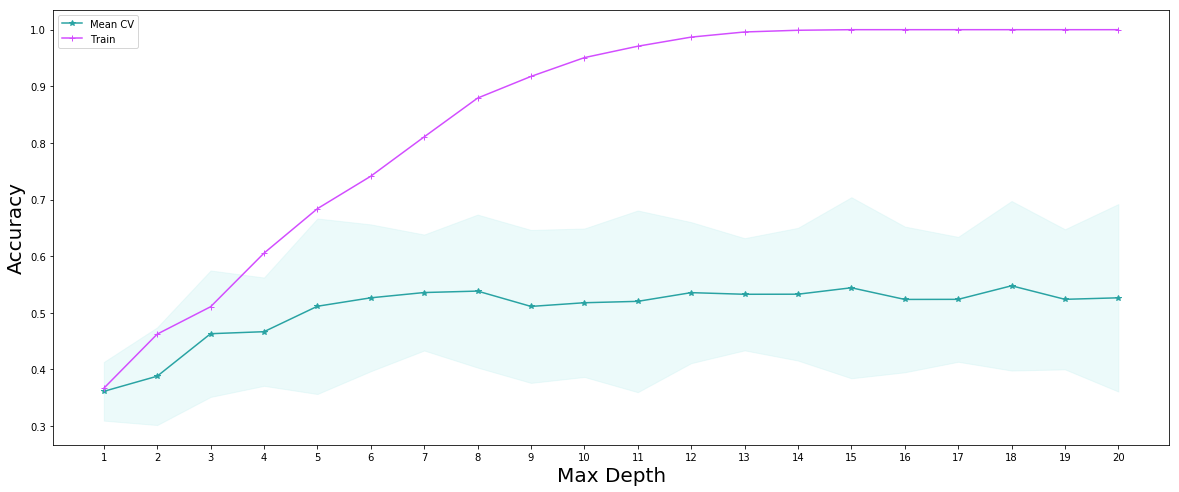

In [38]:
#Ploting the decsion tree scores
fig, ax = plt.subplots(1, 1, figsize=(20,8))

plt.plot(depths, cvmeans, '*-', label="Mean CV", color ="#29a3a3" )
plt.fill_between(depths, cvmeans - 2*cvstds, cvmeans + 2*cvstds, alpha=0.3, color = "#c2f0f0")
plt.plot(depths, train_scores, '-+', label="Train",color = "#d24dff")
plt.legend()
plt.ylabel("Accuracy", fontsize=20)
plt.xlabel("Max Depth", fontsize=20)
plt.xticks(depths)
plt.show()
fig.savefig('trees.png', dpi=60)

In [42]:
best_depth = 18
dt_time = time.time()
best_decision_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=99).fit(x_train, y_train)
dt_time = time.time()- dt_time
print(str(dt_time)+' seconds' )

0.013583898544311523 seconds


In [44]:
cv_scores['decision tree'] = cross_val_score(best_decision_tree, x_test, y_test, cv=5)
print("Training set score is:\n"+str(best_decision_tree.score(x_train,y_train))) 
print("Test set score is:\n",best_decision_tree.score(x_test,y_test))

Training set score is:
1.0
Test set score is:
 0.5210843373493976


---
## Model 6: Random Forest

In [63]:
#Fit a Random Forest model
dt_time = time.time()

n_trees = 500
fitted_rf = RandomForestClassifier(n_estimators=n_trees, max_depth=best_depth).fit(x_train,y_train)

dt_time = time.time()- dt_time
print(str(dt_time)+' seconds' )

1.0230648517608643 seconds


In [64]:
random_forest_train_score = fitted_rf.score(x_train, y_train)
random_forest_test_score = fitted_rf.score(x_test, y_test)
print(f"The Random Forest scored {random_forest_train_score:.3f} on the training set.")
print(f"The Random Forest scored {random_forest_test_score:.3f} on the test set.")
cv_scores['Random Forest'] = cross_val_score(fitted_rf, x_test, y_test, cv=5)


The Random Forest scored 1.000 on the training set.
The Random Forest scored 0.702 on the test set.


---
## Model 7 : AdaBoost

In [93]:
# your code here
ada_time = time.time()

ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6), n_estimators=1000, learning_rate=0.05)
ada_fitted = ada.fit(x_train, y_train)


ada_time = time.time()- ada_time
print(str(ada_time)+' seconds' )

7.427016973495483 seconds


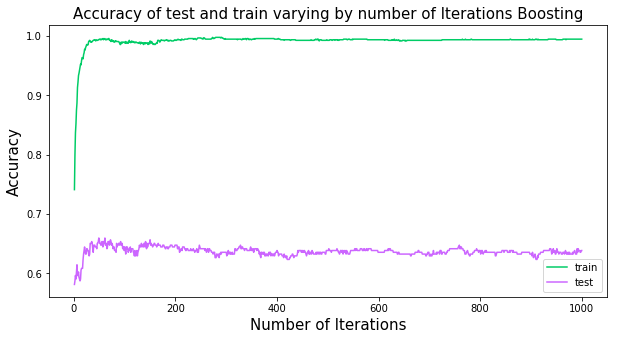

In [94]:
ada_train_scores = list(ada_fitted.staged_score(x_train, y_train))
ada_test_scores = list(ada_fitted.staged_score(x_test, y_test))

plt.figure(figsize=(10,5))
plt.plot(range(1,1001), ada_train_scores, 'g-', label = 'train', color = "#00cc66")
plt.plot(range(1,1001), ada_test_scores, 'b-', label = 'test',color="#cc66ff")

plt.ylabel("Accuracy",fontsize=15)
plt.xlabel("Number of Iterations",fontsize=15)
plt.title('Accuracy of test and train varying by number of Iterations Boosting',fontsize=15)
plt.legend();
plt.savefig('adaboost.png', dpi=60)

In [95]:
# redo adaboost for best_n_iterations
best_n = 60
ada_time = time.time()

ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6), n_estimators=best_n, learning_rate=0.05)
ada_fitted = ada.fit(x_train, y_train)


ada_time = time.time()- ada_time
print(str(ada_time)+' seconds' )

0.475006103515625 seconds


In [96]:
ada_train_scores = list(ada_fitted.staged_score(x_train, y_train))
ada_test_scores = list(ada_fitted.staged_score(x_test, y_test))
cv_scores['AdaBoost'] = cross_val_score(ada_fitted, x_test, y_test, cv=5)
print("Training set score is:\n"+str(ada_fitted.score(x_train,y_train))) 
print("Test set score is:\n" , ada_fitted.score(x_test,y_test))

Training set score is:
0.9889224572004028
Test set score is:
 0.6475903614457831


----
## Comparing Models

As we saw in the statistic table of the cross validation score of 7 models, the random forest overperforms all others on average, thus we will keep the random forest as our prediction model.

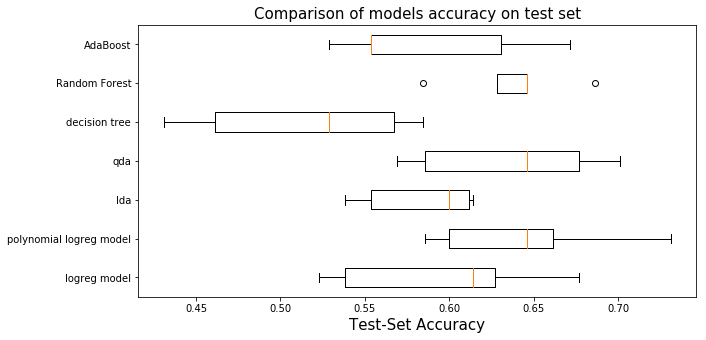

In [98]:
plt.figure(figsize=(10,5))
named_classifiers = cv_scores.columns.values
positions = np.arange(len(named_classifiers))
plt.boxplot(cv_scores.T, vert=False, positions=positions);
plt.yticks(positions,named_classifiers )
#plt.ylabel("Classifier")
plt.xlabel("Test-Set Accuracy",fontsize =15);
plt.title('Comparison of models accuracy on test set',fontsize=15)

plt.savefig('boxplot.png', dpi=60)

In [99]:
cv_scores.describe()

,logreg model,polynomial logreg model,lda,qda,decision tree,Random Forest,AdaBoost
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.595923,0.644950,0.583707,0.635903,0.514532,0.638412,0.587735
std,0.064156,0.057597,0.035130,0.057127,0.066527,0.036843,0.060600
min,0.523077,0.585714,0.538462,0.569231,0.430769,0.584615,0.528571
25%,0.538462,0.600000,0.553846,0.585714,0.461538,0.628571,0.553846
50%,0.614286,0.646154,0.600000,0.646154,0.528571,0.646154,0.553846
75%,0.626866,0.661538,0.611940,0.676923,0.567164,0.646154,0.630769
max,0.676923,0.731343,0.614286,0.701493,0.584615,0.686567,0.671642


---
** Prediction **

In [ ]:
# creating prediction values on the test set for the next module, which is song suggestion
pred_y_test_rf = fitted_rf.predict(x_test)

## Recommending Songs
<hr style="height:1pt">

In this section we recommend a set of N songs to be added to a given playlist. Our set of playlists is the test set, therefore, for each playlist in the test set, we recommend N additional and unique songs to be added to each playlist. The recommended songs are obtained from a pool we created that contains approximately 35,000 unique songs.

We choose songs from the pool based on two methods:

The first model is the simpler model where based on the predicted genre of a given playlist, we randomly recommend songs that belong to that genre. We make sure to recommended a set of unique songs that are not present in the playlist. Clearly, this is a very simple model and might not be reflective of the style of songs that are in a given playlist.

We improve upon this simple model in our second model. In this improved model, we not only look at the predicted genre for song selection, but we utilize cosine similarity to rank which songs from the pool most likely resemble a given playlist. For cosine similarity comparison, we use the average of each song feature to create a vector to compare against each song's feature vector in the pool.

In [ ]:
#remove string 'genre_' from list of predictions as not needed
y_pred_selected = [g[len('genre_'):] for g in pred_y_test_rf]

#add playlist id to test set to know which songs belong to which playlist
x_test['pid'] = x_test_pid

In [ ]:
#reading spotify playlist files which are in json format

file_names = ["mpd.slice.0-999", "mpd.slice.1000-1999", "mpd.slice.2000-2999",
              "mpd.slice.3000-3999", "mpd.slice.4000-4999", "mpd.slice.5000-5999",
              "mpd.slice.6000-6999", "mpd.slice.7000-7999", "mpd.slice.8000-8999", "mpd.slice.9000-9999"]

spotify_playlist = []
for file in file_names:
    with open(path+"/"+file+".json", "r") as fd:
        plylist_temp = json.load(fd)
        plylist_temp = plylist_temp.get('playlists')
        spotify_playlist = spotify_playlist + plylist_temp

### Simple Model for Song Recommendation

We first define the number of songs we wish to recommend to each playlist in the test sest. In this case, we will recommend 10 additional songs to each playlist and define the path to the pool csv file:

In [ ]:
N = 10
pool_path = path+'/'+'big_song_pool.csv'

We then run the simple model. We constructed functions that suggest songs based on genre (the simple model). The function, called "suggest_genre_songs", takes as inputs the number of songs to be recommended, the genre of a given playlist, the list of songs in that playlist, and the path to the pool file. The function returns a dataframe containing an N list of songs to be added to the playlist. See [Supporting Functions for Song Recommendations](#Supporting_Functions) section below for further information.

We use a loop to recommend N songs to each of the playlists in the test set. We add a limiter in case we don't want to try recommending songs to all playlists in test set for computational purposes. We store the results in a list.

In [ ]:
simple_test_recs = []

stop = 15

i = 0
for pid, current_y in zip(x_test.pid, y_pred_selected):
    current_playlist = sps.get_playlist_n(spotify_playlist[pid], feature = 'track_uri', n_playlist = pid)
    simple_test_recs.append(recs.suggest_genre_songs(N, current_y, current_playlist, pool_path))
    
    i += 1
    if i == stop:
        break

### Improved Model for Song Recommendation

The calling and using of the improved model is very similar to the simple model. We call a function that uses the improved model logic to recommend songs based on cosine similarity. The function takes in the same inputs as the simple model with one additional argument which is the feature vector to be used for cosine similarity comparison. See [Supporting Functions for Song Recommendations](#Supporting_Functions) section below for further information.

In [ ]:
best_test_recs = []

i = 0
for pid, current_y, f_vector in zip(x_test.pid, y_pred_selected, x_test.iterrows()):
    current_playlist = sps.get_playlist_n(spotify_playlist[pid], feature = 'track_uri', n_playlist = pid)
    best_test_recs.append(recs.suggest_best_songs(f_vector[1].drop('pid'), N, current_y, current_playlist, pool_path))
    
    i += 1
    if i == stop:
        break

In [ ]:
test_result_playlist = 4

In [ ]:
y_pred_selected[test_result_playlist]

In [ ]:
simple_test_recs[test_result_playlist]

In [ ]:
best_test_recs[test_result_playlist]

In [ ]:
songs = sps.get_playlist_n(spotify_playlist[test_result_playlist], 
                           feature = 'track_uri', n_playlist = test_result_playlist)

In [ ]:
sp = sps.create_spotipy_obj()
tracks =  sp.tracks(songs[:50]) #limit printing original playlist to 50 for visual purposes

df_data = []
for i in tracks['tracks']:
    song_name = i['name']
    artist_name = i['artists'][0]['name']
    album_name = i['album']['name']
    song_uri = i['uri']
    df_data.append([song_name, artist_name, album_name, song_uri])

df = pd.DataFrame(df_data)
df.columns = ['song_name', 'artist_name', 'album_name', 'song_uri']
df

<a id='Supporting_Functions'></a>
## Supporting Functions for Song Recommendations

For purposes of ease of reading of this notebook, we pushed the song recommendation models into functions stored in a .py file called "recommend_song_set.py". This not only simplifies the code, but it makes it easy to re-use these functions in case we want to further improve our models and/or genre classification. For example, if we decide to suggest 30% pop songs and 70% rock songs, these functions can be called twice in order to recommend these percentage of songs by genre. The functions are presented below.

### Simple model for song recommendation explanation

The simpler model takes in as input the following:
   - N: corresponds to the number of songs to return. [type int]
   - genre: genre classification based on our model, for example: 'rock'. [type string] 
   - playlist: a pandas dataframe containing the playlist used for recommendation. [type pandas dataframe]
   - pool_path: path to pool file. [type string]

and outputs a dataframe containing the recommended songs to be added to the given playlist. An example of the output dataframe is the following:

| Song Name               | Artist Name           | Album Name                                        | Song URI                             |
|-------------------------|-----------------------|---------------------------------------------------|--------------------------------------|
| Wonderwall - Remastered | Oasis                 | (What's The Story) Morning Glory? [Remastered]    | spotify:track:5qqabIl2vWzo9ApSC317sa |
| 1979 - Remastered 2012  | The Smashing Pumpkins | Mellon Collie And The Infinite Sadness (Remast... | spotify:track:3Y8Ff1nH44jFywAtpgmleZ |
|                         |                       |                                                   |                                      |


The logic of this model is quite simple. It takes in the predicted genre of the playlist and recommends songs of that genre to be added. It checks to see that the recommended songs are not already contained in the playlist so it recommends new and unique songs to be added. This model selects songs of that specified genre by randomizing that subset of the pool and recommending N requested songs.

In [ ]:
def suggest_genre_songs(N: int, genre: str, playlist, pool_path: str):
    """
    This function recommends N best songs to be added to a playlist based on
    the genre of the playlist. It randomizes the pool and sugests N randomly
    chosen songs from that genre.
    INPUTS:
        N: (int) number of songs to return as recommendations
        genre: (string) classification based on our model
        playlist: (pandas dataframe) a pandas dataframe containing the playlist
            being analyzed.
        pool_path: (string) path to the pool file
    OUTPUT:
        df: (pandas df) df of recommended songs with some information
    """
    import pandas as pd
    import numpy as np
    import spotify_api_function_set as spf

    dtypes = {'song_uri': str, 'duration_ms': np.int64, 'time_signature': np.int64,
              'key': np.int64, 'tempo': np.float64, 'energy': np.float64, 'mode': np.int64,
              'loudness': np.float64, 'speechiness': np.float64, 'danceability': np.float64,
              'acousticness': np.float64,'instrumentalness': np.float64, 'valence': np.float64,
              'liveness': np.float64, 'artist_followers': np.int64, 'artist_uri': str,
              'artist_name': str, 'artist_popularity': np.int64, 'genre': str}

    pool = pd.read_csv(pool_path, dtype=dtypes).sample(frac=1)
    pool = pool.loc[pool['genre'] == genre]

    songs = []
    i = 0
    while len(songs) < N:
        song = pool.song_uri.iloc[i]
        if not song in playlist:
            songs.append(song)

        i += 1

    sp = spf.create_spotipy_obj()
    tracks =  sp.tracks(songs)

    df_data = []
    for i in tracks['tracks']:
        song_name = i['name']
        artist_name = i['artists'][0]['name']
        album_name = i['album']['name']
        song_uri = i['uri']
        df_data.append([song_name, artist_name, album_name, song_uri])

    df = pd.DataFrame(df_data)
    df.columns = ['song_name', 'artist_name', 'album_name', 'song_uri']

    return df

### Advanced model for song recommendation explanation

The advanced model takes in as input the following:
   - feature_vector: vector of feature averages of the playlist being analyzed. [type pd series]
   - N: corresponds to the number of songs to return. [type int]
   - genre: genre classification based on our model, for example: 'rock'. [type string] 
   - playlist: a pandas dataframe containing the playlist used for recommendation. [type pd dataframe]
   - pool_path: path to pool file. [type string]

Notice that this advanced model requires an additional input. This additional input is a vector of a given test playlist features. The vector is the average of each feature for all songs in a given playlist. This vector is necesarry for performing cosine similarity.

The output is a dataframe exactly as the one for the simple model (see above explanation).

The logic of this model is a bit more advanced than the simple model. Instead of suggesting N random songs from a specific genre from the pool of songs, it calculates the cosine similarity between that of the vector of features of a playlist and the vector of features for every song in the pool beloning to the same genre as the playlist. It then ranks that subset of songs and recommends N songs with highest cosine similarity to the feature vector.

It's important to mention again that we only do cosine similarity between the feature vector and a subset of the song pool. The subset is limited to match the predicted genre for the playlist. A natural question is why do we do this only for a subset and not for the entire pool as there may be songs that are not in that genre that might be a better fit based on cosine similarity? There are to principal reasons:
1. Even if we assume there are songs from an outside genre that might better fit the feature vector, it wouldn't make sense to recommend a song from a genre that isn't inside the current playlist as it interrupts the "mood" of the playlist. We are assuming users create playlists primarily based on genre so it wouldn't make sense to add a pop song to a playlist that has all rock songs even if a particular pop song might be a better match.
2. The second reason, which is less imporant, is for computational purposes. Calculating the cosine similarity for a pool of about 170,000 songs each time a playlist is passed is resource intensive.

The idea of using cosine similarity came from talks with our TA for this project Mehul Smriti (thank you!).

In [ ]:
def suggest_best_songs(feature_vector, N: int, genre: str, playlist, pool_path: str):
    """
    This function recommends N best songs to be added to a playlist based on
    cosine similarity between the suggested songs and the songs in the playlist.
    Cosine similarity is calculated for a subset of the pool based on genre
    classification.
    INPUTS:
        N: (int) number of songs to return as recommendations
        genre: (string) classification based on our model
        feature_vector: (np series) a vector of audio features to use for cosine
            similarity comparison.
        pool_path: (string) path to the pool file
    OUTPUT:
        df: (pandas df) df of recommended songs with some information
    """
    import pandas as pd
    import numpy as np
    import spotify_api_function_set as spf
    from sklearn.metrics.pairwise import cosine_similarity

    dtypes = {'song_uri': str, 'duration_ms': np.int64, 'time_signature': np.int64,
              'key': np.int64, 'tempo': np.float64, 'energy': np.float64, 'mode': np.int64,
              'loudness': np.float64, 'speechiness': np.float64, 'danceability': np.float64,
              'acousticness': np.float64,'instrumentalness': np.float64, 'valence': np.float64,
              'liveness': np.float64, 'artist_followers': np.int64, 'artist_uri': str,
              'artist_name': str, 'artist_popularity': np.int64, 'genre': str}

    pool = pd.read_csv(pool_path, dtype=dtypes)
    pool = pool.loc[pool['genre'] == genre]
    song_uri = pool.song_uri
    drop = set(pool.columns)^set(list(feature_vector.index))

    pool = pool.drop(drop, axis=1)

    feature_vector = np.array(feature_vector.values.reshape(1,-1))

    similarity = []
    for index, row in pool.iterrows():
        similarity.append(float(cosine_similarity(np.array(row.values.reshape(1,-1)),feature_vector)))

    pool['similarity'] = similarity
    pool['song_uri'] = song_uri
    pool = pool.sort_values(by=['similarity'], ascending=False)

    songs = []
    i = 0
    while len(songs) < N:
        song = pool.song_uri.iloc[i]
        if not song in playlist:
            songs.append(song)

        i += 1

    sp = spf.create_spotipy_obj()
    tracks =  sp.tracks(songs)

    df_data = []
    for i in tracks['tracks']:
        song_name = i['name']
        artist_name = i['artists'][0]['name']
        album_name = i['album']['name']
        song_uri = i['uri']
        df_data.append([song_name, artist_name, album_name, song_uri])

    df = pd.DataFrame(df_data)
    df.columns = ['song_name', 'artist_name', 'album_name', 'song_uri']

    return df

In [ ]:
# Model